Total data: 37 years
80 percent data = 1980 to 2009


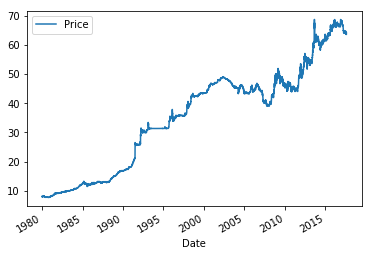

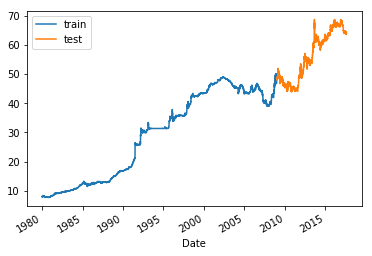

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:79: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:80: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:82: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:83: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Train size: (7451 x 1)
Test size: (2245 x 1)
Epoch 1/20
7451/7451 [==============================] - 1s 170us/step - loss: 0.0029
Epoch 2/20
7451/7451 [==============================] - 1s 125us/step - loss: 9.7106e-06
Epoch 3/20
7451/7451 [==============================] - 1s 116us/step - loss: 1.0538e-05
Epoch 4/20
7451/7451 [==============================] - 1s 119us/step - loss: 1.0432e-05
Epoch 5/20
7451/7451 [==============================] - 1s 122us/step - loss: 1.2302e-05
Epoch 6/20
7451/7451 [==============================] - 1s 122us/step - loss: 1.2821e-05
Epoch 7/20
7451/7451 [==============================] - 1s 127us/step - loss: 1.9558e-05
Epoch 8/20
7451/7451 [==============================] - 1s 126us/step - loss: 2.8758e-05
Epoch 9/20
7451/7451 [==============================] - 1s 126us/step - loss: 1.5733e-05
Epoch 10/20
7451/7451 [==============================] - 1s 116us/step - loss: 2.5669e-05
Epoch 11/20
7451/7451 [==============================] - 1s 118us/st

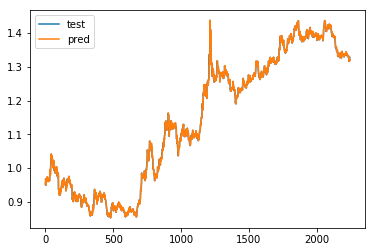

In [2]:
#!/usr/bin/env python
# coding: utf-8

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import keras.backend as K

# ## Get the dataset and prepare it for analysis and model

# #### Set the index to date

df = pd.read_csv('USD_INR.csv')
df['Date'] = pd.to_datetime(df["Date"])
df_idx = df.set_index(["Date"], drop=True)
# print(df_idx.head(5))


# #### Flip the dataframe

df_idx = df_idx.sort_index(axis=1, ascending=True)
df_idx = df_idx.iloc[::-1]


# #### Plot the data

data = df_idx[['Price']]
data.plot(y='Price')

diff = data.index.values[-1] - data.index.values[0]
days = diff.astype('timedelta64[D]')
days = days / np.timedelta64(1, 'D')
years = int(days/365)
print("Total data: %d years"%years)
print("80 percent data = 1980 to %d"%(1980 + int(0.8*years)))


# #### Create training and testing data

split_date = pd.Timestamp('01-01-2009')

train = data.loc[:split_date]
test = data.loc[split_date:]

# ax = train.plot(figsize=(10,12))
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])
plt.show()


# #### Normalize the dataset

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)


train_sc_df = pd.DataFrame(train_sc, columns=['Y'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Y'], index=test.index)

for s in range(1,2):
    train_sc_df['X_{}'.format(s)] = train_sc_df['Y'].shift(s)
    test_sc_df['X_{}'.format(s)] = test_sc_df['Y'].shift(s)

X_train = train_sc_df.dropna().drop('Y', axis=1)
y_train = train_sc_df.dropna().drop('X_1', axis=1)


X_test = test_sc_df.dropna().drop('Y', axis=1)
y_test = test_sc_df.dropna().drop('X_1', axis=1)

X_train = X_train.as_matrix()
y_train = y_train.as_matrix()

X_test = X_test.as_matrix()
y_test = y_test.as_matrix()


print('Train size: (%d x %d)'%(X_train.shape[0], X_train.shape[1]))
print('Test size: (%d x %d)'%(X_test.shape[0], X_test.shape[1]))


from sklearn.metrics import r2_score


# ## Build a Neural Network

K.clear_session()
model = Sequential()
model.add(Dense(50, input_shape=(1,), activation='relu', kernel_initializer='lecun_uniform'))
model.add(Dense(50, input_shape=(1,), activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=16, epochs=20, verbose=1)


y_pred = model.predict(X_test)
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(['test', 'pred'])
print('R-Squared: %f'%(r2_score(y_test, y_pred)))




